In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv(r"C:\Users\jades\Documents\Wa_data.csv")
df


,Date,State,County,Vehicle Primary Use,Battery_Electric_Vehicles(BEVs),Plug-In_Hybrid_Electric_Vehicles(PHEVs),Electric_Vehicle_(EV)Total,Non-Electric_Vehicle_Total,Total_Vehicles
0,30-06-2022,WA,Ferry,Truck,0,0,0,3575,3575
1,31-01-2019,WA,Columbia,Truck,0,0,0,1529,1529
2,30-06-2021,WA,Skamania,Truck,0,0,0,4026,4026
3,31-01-2017,WA,Douglas,Truck,0,0,0,11425,11425
4,31-05-2022,WA,Yakima,Truck,0,0,0,61408,61408
...,...,...,...,...,...,...,...,...,...
6703,31-03-2022,WA,Whitman,Truck,0,0,0,8591,8591
6704,31-07-2019,WA,Spokane,Passenger,556,435,991,312662,313653
6705,30-04-2023,WA,Pend Oreille,Passenger,31,13,44,8902,8946
6706,31-12-2021,WA,Garfield,Passenger,0,3,3,1348,1351


In [14]:
df.shape

(6708, 9)

In [15]:
df['State'].unique()


array(['WA'], dtype=object)

In [16]:
df['Battery_Electric_Vehicles(BEVs)'].unique()

array([  0,  19,   6, ..., 758, 256, 744], dtype=int64)

In [17]:
df.describe()

,Battery_Electric_Vehicles(BEVs),Plug-In_Hybrid_Electric_Vehicles(PHEVs),Electric_Vehicle_(EV)Total,Non-Electric_Vehicle_Total,Total_Vehicles
count,6708.000000,6708.000000,6708.000000,6.708000e+03,6.708000e+03
mean,672.513417,246.778473,919.291890,7.757213e+04,7.849142e+04
std,3976.076531,1120.623948,5080.697391,1.769069e+05,1.810408e+05
min,0.000000,0.000000,0.000000,9.250000e+02,9.250000e+02
25%,0.000000,0.000000,0.000000,9.239750e+03,9.254750e+03
50%,7.000000,1.000000,10.000000,2.500700e+04,2.529450e+04
75%,127.000000,80.000000,214.250000,6.109075e+04,6.123100e+04
max,72333.000000,17501.000000,89834.000000,1.399823e+06,1.430937e+06


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6708 entries, 0 to 6707
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Date                                     6708 non-null   object
 1   State                                    6708 non-null   object
 2   County                                   6708 non-null   object
 3   Vehicle Primary Use                      6708 non-null   object
 4   Battery_Electric_Vehicles(BEVs)          6708 non-null   int64 
 5   Plug-In_Hybrid_Electric_Vehicles(PHEVs)  6708 non-null   int64 
 6   Electric_Vehicle_(EV)Total               6708 non-null   int64 
 7   Non-Electric_Vehicle_Total               6708 non-null   int64 
 8   Total_Vehicles                           6708 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 471.8+ KB


#  Outliers detection

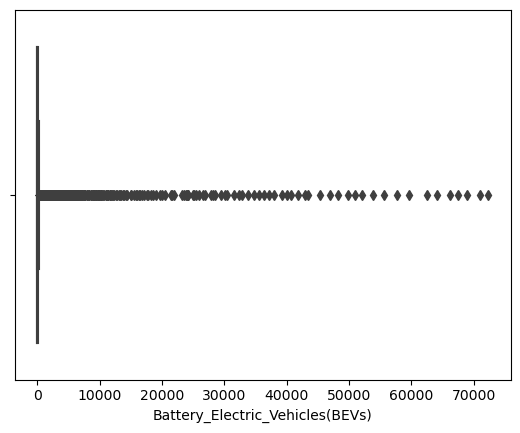

In [19]:

sns.boxplot(x="Battery_Electric_Vehicles(BEVs)",data=df)
plt.show()

C:\Users\jades\AppData\Local\Temp\ipykernel_24876\926298302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Battery_Electric_Vehicles(BEVs)"])
C:\Users\jades\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


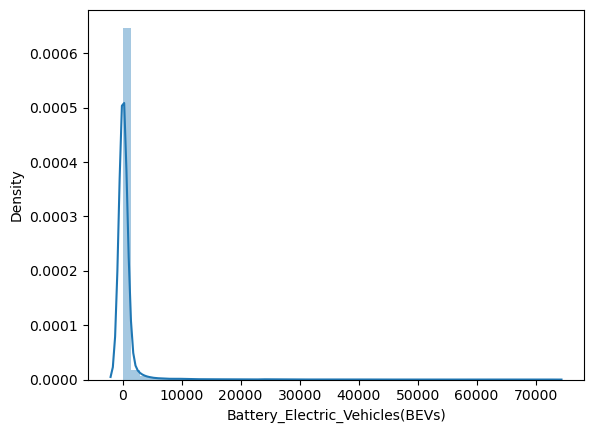

In [20]:
sns.distplot(df["Battery_Electric_Vehicles(BEVs)"])
plt.show()

# To remove outliers by using IQR method

In [ ]:
df.shape

In [21]:
import pandas as pd

# Assuming df is your DataFrame and these are the correct column names
columns = ['Battery_Electric_Vehicles(BEVs)', 
           'Plug-In_Hybrid_Electric_Vehicles(PHEVs)', 
           'Electric_Vehicle_(EV)Total', 
           'Non-Electric_Vehicle_Total', 
           'Total_Vehicles']

for col in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the upper bound (max range)
    max_range = Q3 + (1.5 * IQR)
    
    # Filter the dataset to keep only the values within the upper bound
    new_dataset= df[df[col] <= max_range]

# Display the filtered dataset (with max range values only)
print(new_dataset)



            Date State        County Vehicle Primary Use  \
0     30-06-2022    WA         Ferry               Truck   
1     31-01-2019    WA      Columbia               Truck   
2     30-06-2021    WA      Skamania               Truck   
3     31-01-2017    WA       Douglas               Truck   
4     31-05-2022    WA        Yakima               Truck   
...          ...   ...           ...                 ...   
6701  31-03-2020    WA        Chelan           Passenger   
6703  31-03-2022    WA       Whitman               Truck   
6705  30-04-2023    WA  Pend Oreille           Passenger   
6706  31-12-2021    WA      Garfield           Passenger   
6707  28-02-2022    WA        Island           Passenger   

      Battery_Electric_Vehicles(BEVs)  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                              

In [22]:
new_dataset

,Date,State,County,Vehicle Primary Use,Battery_Electric_Vehicles(BEVs),Plug-In_Hybrid_Electric_Vehicles(PHEVs),Electric_Vehicle_(EV)Total,Non-Electric_Vehicle_Total,Total_Vehicles
0,30-06-2022,WA,Ferry,Truck,0,0,0,3575,3575
1,31-01-2019,WA,Columbia,Truck,0,0,0,1529,1529
2,30-06-2021,WA,Skamania,Truck,0,0,0,4026,4026
3,31-01-2017,WA,Douglas,Truck,0,0,0,11425,11425
4,31-05-2022,WA,Yakima,Truck,0,0,0,61408,61408
...,...,...,...,...,...,...,...,...,...
6701,31-03-2020,WA,Chelan,Passenger,220,79,299,54474,54773
6703,31-03-2022,WA,Whitman,Truck,0,0,0,8591,8591
6705,30-04-2023,WA,Pend Oreille,Passenger,31,13,44,8902,8946
6706,31-12-2021,WA,Garfield,Passenger,0,3,3,1348,1351


In [ ]:
new_dataset.describe

In [25]:
n=new_dataset["Vehicle Primary Use"] == "Truck"
print(n.value_counts())

Vehicle Primary Use
True     3223
False    2580
Name: count, dtype: int64


#  Add new column 


In [ ]:
  # Calculate the percentage of electric vehicles among total vehicles registered in each county over time. 
new_dataset["percentage of electric vehicles"] = ((new_dataset["Electric_Vehicle_(EV)Total"]/ new_dataset["Total_Vehicles"])*100)

In [ ]:
new_dataset.head(10)

In [ ]:

import pandas as pd

# Load your data
df = pd.read_csv(r"C:\Users\jades\Documents\Wa_data.csv") 

# Outlier treatment using IQR


columns = ['Battery_Electric_Vehicles(BEVs)', 
           'Plug-In_Hybrid_Electric_Vehicles(PHEVs)', 
           'Electric_Vehicle_(EV)Total', 
           'Non-Electric_Vehicle_Total', 
           'Total_Vehicles']

for col in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the upper bound (max range)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Filter the dataset to keep only the values within the upper bound
    data = df[df[col] <= upper_bound]

# Display the filtered dataset (with max range values only)



output_file_path = r"C:\Users\jades\Downloads\WA Data.xlsx"
new_dataset.to_excel(output_file_path , index=False)
print(f"Cleaned dataset created and saved to {output_file_path}")


In [1]:
import pandas as pd
Dataset=pd.read_excel(r"C:\Users\jades\OneDrive\Documents\python data analytics.xlsx")
Dataset.head()

C:\Users\jades\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year-Month,State,County,Vehicle Primary Use,Battery_Electric_Vehicles(BEVs),Plug-In_Hybrid_Electric_Vehicles(PHEVs),Electric_Vehicle_(EV)Total,Non-Electric_Vehicle_Total,Total_Vehicles,percentage of electric vehicles
0,2022-06,WA,Ferry,Truck,0,0,0,3575,3575,0.0
1,2019-01,WA,Columbia,Truck,0,0,0,1529,1529,0.0
2,2021-06,WA,Skamania,Truck,0,0,0,4026,4026,0.0
3,2017-01,WA,Douglas,Truck,0,0,0,11425,11425,0.0
4,2022-05,WA,Yakima,Truck,0,0,0,61408,61408,0.0


0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
5798    0.005459
5799    0.000000
5800    0.004918
5801    0.002221
5802    0.017269
Length: 5803, dtype: float64